In [18]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [6]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

#drop NaN from salary_year_avg
df_DS = df_DS.dropna(subset=['salary_year_avg'])

In [14]:
df_DS = df.groupby('company_name', as_index=False)['salary_year_avg'].median()
df_top5_company = df_DS.sort_values(by='salary_year_avg', ascending=False).head(5)


In [15]:
df_top5_company

,company_name,salary_year_avg
73551,MSP Staffing LTD,890000.0
74673,Mantys,650000.0
97421,ReServe,585000.0
38228,"East River Electric Power Cooperative, Inc.",537000.0
128881,WhatsApp,463500.0


<Axes: >

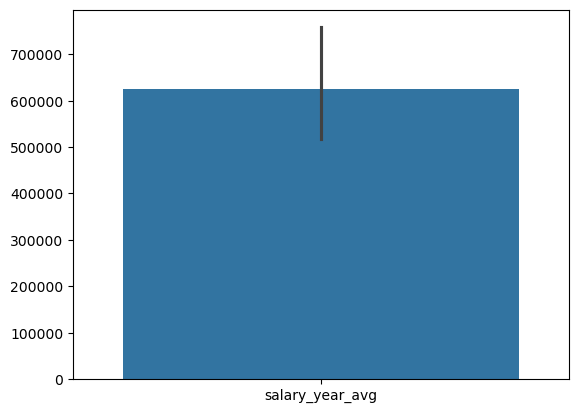

In [19]:
sns.barplot(df_top5_company)

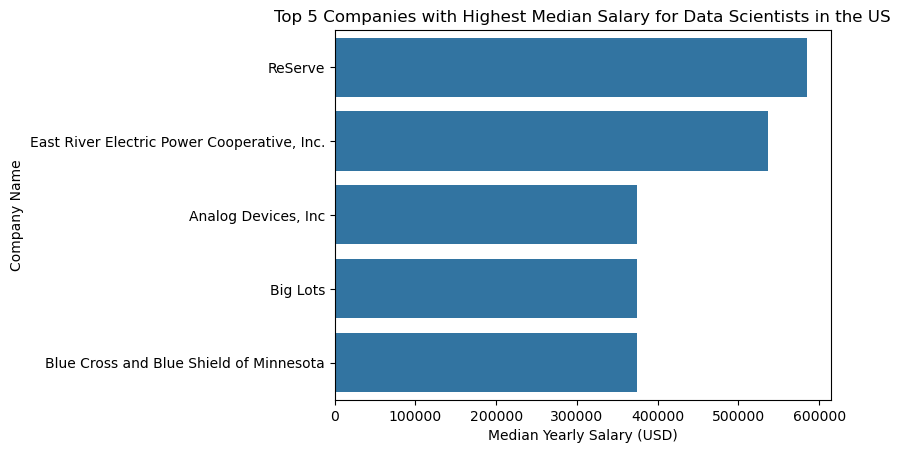

In [20]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()